In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
data = pd.read_excel('/kaggle/input/covid19/dataset.xlsx', index_col=0)
#pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
dfp = data.copy()
dfp.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#from coid_eda, we re-write
missing_rate = dfp.isna().sum()/dfp.shape[0]
blood_cols = list(dfp.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_cols = list(dfp.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

key_cols= ['Patient age quantile', 'SARS-Cov-2 exam result']

dfp = dfp[key_cols + blood_cols + viral_cols]
dfp.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [4]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(dfp, test_size=0.2, random_state=0)
print(trainset['SARS-Cov-2 exam result'].value_counts())
print('__________________________________________')
print(testset['SARS-Cov-2 exam result'].value_counts())

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64
__________________________________________
negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64


In [5]:
'''____________________________FUNC BLOCK__________________________________'''
#the adventage of having funcs is that we will apply them repeatedly for trainset and then testset

def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in dfp.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df


def imputation(df):
    df = df.dropna(axis=0)
    return  df


def feature_engineering(df):
    df['has illness'] = df[viral_cols].sum(axis=1) >= 1
    df = df.drop(viral_cols, axis=1)
    return df


def preprocess(df):
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y



#==================================================================================================================

def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    p_cases = len(y_test[y_test == 0])
    n_cases = len(y_test[y_test == 1])
    print(f'Test set total patient number: {len(y_test)}')
    print(f'Positive cases: {p_cases}, predicted: {confusion_matrix(y_test, y_pred)[0][0]} true positives and {confusion_matrix(y_test, y_pred)[0][1]} false positives')
    print(f'Positive cases: {n_cases}, predicted: {confusion_matrix(y_test, y_pred)[1][0]} false negatives and {confusion_matrix(y_test, y_pred)[1][1]} true negatives')
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, cv=4, X=X_train, y=y_train,
                                               scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='train score')
    plt.legend()

def feature_tableau(model, my_train_set):
    feature_tabl = pd.DataFrame(model.feature_importances_, index=my_train_set.columns)
    feature_tabl.plot.bar(figsize=(12, 8))

In [6]:
X_train, y_train = preprocess(trainset)
X_test, y_test = preprocess(testset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


In [7]:
#DecisionTree is chosen because one assume that it is easier for our dataset
#
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=0)

#N.B. I always put random_state=0 for repeatabilty of our model

Test set total patient number: 111
Positive cases: 95, predicted: 86 true positives and 9 false positives
Positive cases: 16, predicted: 9 false negatives and 7 true negatives
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.44      0.44      0.44        16

    accuracy                           0.84       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.84      0.84      0.84       111



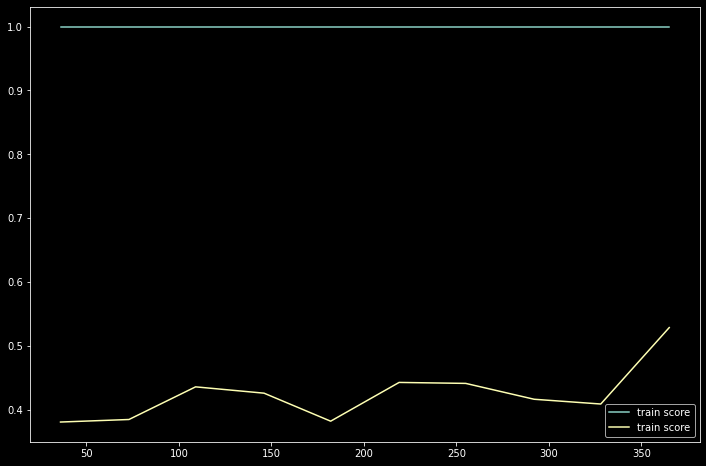

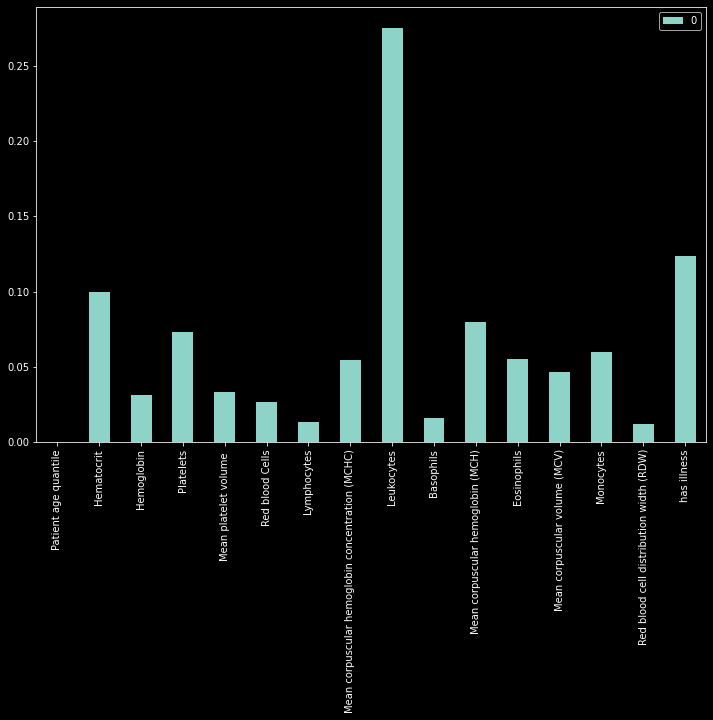

In [8]:
#need type 1/2 error classifiers as well as over/under-fitting knowledge
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

evaluation(model_dt)
feature_tableau(model_dt, X_train)
#graph1:
#bad performance, our model is in overfitting, we may look for important features of our model

#graph2:
#the statement/hypothesis told in covid_eda seems to be legitimate
#the blood rates play a role for the presence of covid in one's body
#we will use another model for our dataset

Test set total patient number: 111
Positive cases: 95, predicted: 92 true positives and 3 false positives
Positive cases: 16, predicted: 13 false negatives and 3 true negatives
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



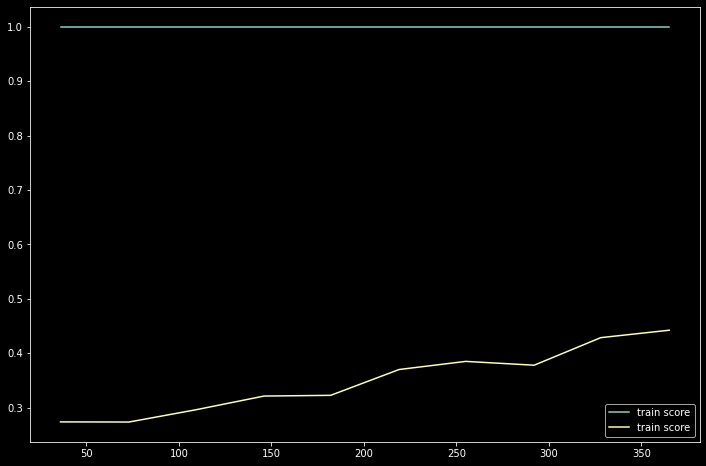

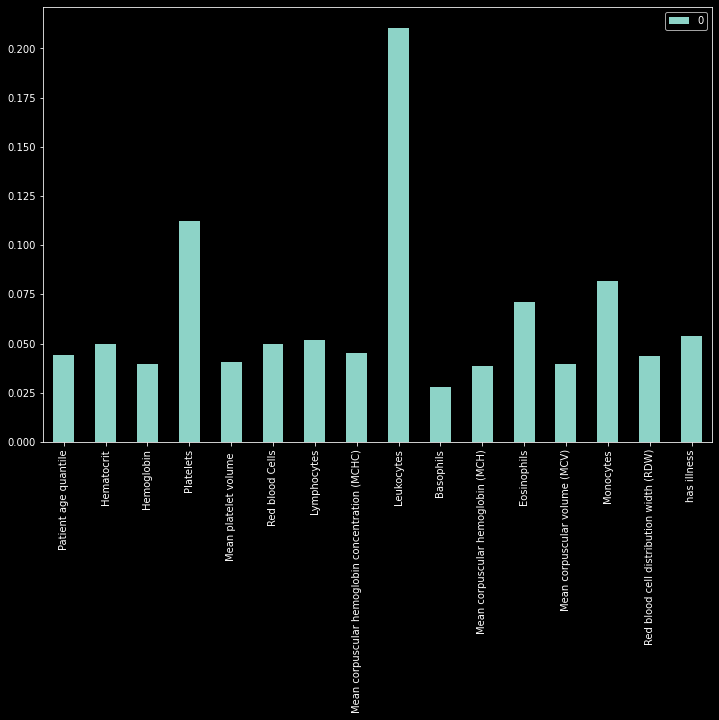

In [9]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=0)
evaluation(model_rf)
feature_tableau(model_rf, X_train)
#graph1:
#no huge changes observable compared to model_dt
#graph2:
#confirms once again the observation for model_dt

#local conclusion (before feature_engineering):
#feature selection may seem difficult, we proceed feature engineering (block with funcs)
#the idea is to put all virus variables who, separetly play no role, become one single column, and take a bigger role for our model

#local conclusion (after feature_engineering):
#Die Situation hat sich nicht verbessert. Man muss eine andere methode benutzen: make_pipeline

Test set total patient number: 111
Positive cases: 95, predicted: 90 true positives and 5 false positives
Positive cases: 16, predicted: 9 false negatives and 7 true negatives
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



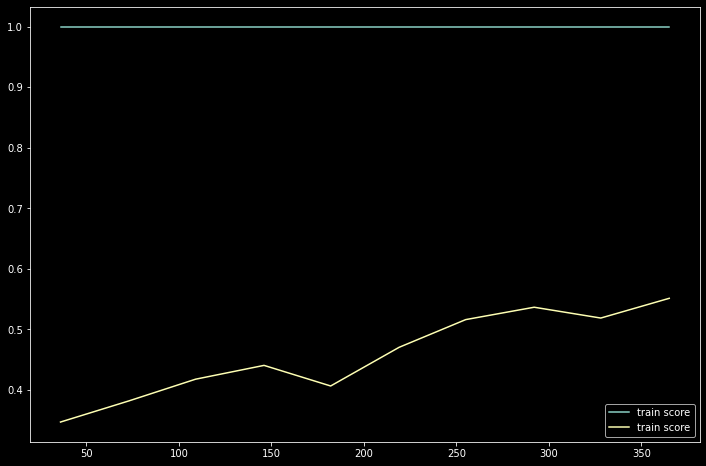

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #f_classif = ANOVA TEST (see internet)


model_pip_rf_anova = make_pipeline(SelectKBest(f_classif, k=4),
                                 RandomForestClassifier(random_state=0))
evaluation(model_pip_rf_anova)
#feature_tableau(model_pip_rf_anova, X_train)
#local conclusion:
#the f1 accuracy is higher with this pipeline, but we may try amplifying our data with polynomial features

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Test set total patient number: 111
Positive cases: 95, predicted: 91 true positives and 4 false positives
Positive cases: 16, predicted: 11 false negatives and 5 true negatives
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/li

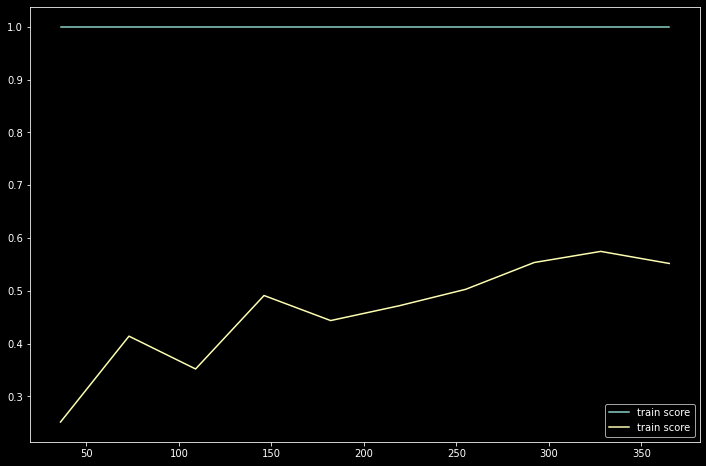

In [11]:
from sklearn.preprocessing import PolynomialFeatures

model_pip_rf_pf =  make_pipeline(PolynomialFeatures(2),
                                 SelectKBest(f_classif, k=10),
                                 RandomForestClassifier(random_state=0))
evaluation(model_pip_rf_pf)
#

In [13]:
'''CONCLUSION PREPROCESSING'''
#various preprocessing practices were used to obtain the best model possible. 
#we may stick to the last one, model_pip_rf_pf because it has the best f1 accuracy.
#BUT, the goal of our modelling part will be the creation of various models and pipelines, and not only developping model_pip_rf_pf 

'CONCLUSION PREPROCESSING'